In [4]:
%matplotlib inline

In [5]:
#Generic imports
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sb
from rasterstats import zonal_stats

#Local imports
from specdal import Collection, Spectrum


## Leer archivos espectrales e interpolar longitudes de onda - SVC

In [105]:
datadir = "Z:/11-Projects/CERESTRES/04-Raw/SVC_HR1024i/Santaella/2022_04_02"
c = Collection(name='santaella_2022_04_02')
metadata = []
for f in sorted(os.listdir(datadir)):
    if f.endswith('.sig'):
        spectrum = Spectrum(filepath=os.path.join(datadir, f))
        c.append(spectrum)
        df = pd.DataFrame([spectrum.metadata])
        metadata.append(df)
df_metadata = pd.concat(metadata)

#Spectral data, transponeral para poder elegir las longitudes de onda.
df_spectral = c.data.transpose()

#Exportar a un CSV (df_metadata y data)
'''
df_metadata.to_csv(datadir+'/'+'metadata.csv', encoding='utf-8', index=False)
c.data.to_csv(datadir+'/'+'data.csv', encoding='utf-8')
'''

#Interpolación de todos los indices del dataframe
init_WV = 338
end_WV  = 2519
interval = 1
new_index = pd.Index(np.arange(init_WV,end_WV,interval))
df_interpolate = c.data.reindex(new_index).interpolate()

#df_interpolate.isna().sum()      #Check if there is NaN

In [119]:
df_stats_full

,level_0,index,fila_real,columna_re,id_josefin,tipo,repeticion,numero_var,nombre_var,file_1,...,MX_min_NIR,MX_max_NIR,MX_mean_NIR,MX_std_NIR,MX_median_NIR,CH_blue_SVC,CH_green_SVC,CH_red_SVC,CH_redEdge_SVC,CH_infrared_SVC
id_real,,,,,,,,,,,,,,,,,,,,,
1001,220402_0922_R001_T002,0,1,1,0.0,secano,0,9999.0,buffer,Z:\11-Projects\CERESTRES\04-Raw\SVC_HR1024i\Sa...,...,0.152900,0.577122,0.427404,0.066040,0.434030,0.015181,0.035335,0.024938,0.090187,0.373636
2001,220402_0923_R001_T003,1,1,2,0.0,secano,0,9999.0,buffer,Z:\11-Projects\CERESTRES\04-Raw\SVC_HR1024i\Sa...,...,0.160568,0.562768,0.383308,0.071115,0.386426,0.010399,0.023536,0.016217,0.059438,0.229814
3001,220402_0923_R001_T004,2,1,3,0.0,secano,0,9999.0,buffer,Z:\11-Projects\CERESTRES\04-Raw\SVC_HR1024i\Sa...,...,0.208420,0.510829,0.397479,0.050806,0.402067,0.016608,0.036437,0.025634,0.090507,0.337989
4001,220402_0923_R001_T005,3,1,4,0.0,secano,0,9999.0,buffer,Z:\11-Projects\CERESTRES\04-Raw\SVC_HR1024i\Sa...,...,0.196627,0.562284,0.379871,0.074061,0.382111,0.017586,0.038359,0.026150,0.092360,0.314018
5001,220402_0924_R001_T006,4,1,5,0.0,secano,0,9999.0,buffer,Z:\11-Projects\CERESTRES\04-Raw\SVC_HR1024i\Sa...,...,0.230481,0.512854,0.399248,0.053995,0.403294,0.018290,0.040502,0.027626,0.098952,0.353793
6001,220402_0924_R001_T007,5,1,6,0.0,secano,0,9999.0,buffer,Z:\11-Projects\CERESTRES\04-Raw\SVC_HR1024i\Sa...,...,0.126210,0.540818,0.404924,0.076065,0.416042,0.008613,0.021054,0.014602,0.055748,0.239762
7001,220402_0924_R001_T008,6,1,7,0.0,secano,0,9999.0,buffer,Z:\11-Projects\CERESTRES\04-Raw\SVC_HR1024i\Sa...,...,0.156003,0.510738,0.350718,0.066509,0.354978,0.015844,0.034888,0.024173,0.085506,0.302772
8001,220402_0925_R001_T009,7,1,8,0.0,secano,0,9999.0,buffer,Z:\11-Projects\CERESTRES\04-Raw\SVC_HR1024i\Sa...,...,0.194467,0.501245,0.382568,0.054666,0.387884,0.013229,0.029359,0.020780,0.072717,0.288285
9001,220402_0925_R001_T010,8,1,9,0.0,secano,0,9999.0,buffer,Z:\11-Projects\CERESTRES\04-Raw\SVC_HR1024i\Sa...,...,0.094927,0.558956,0.366360,0.090652,0.377396,0.014254,0.033801,0.023504,0.089045,0.368068


## Errores en las medidas 3 y 7

<AxesSubplot:xlabel='wavelength'>

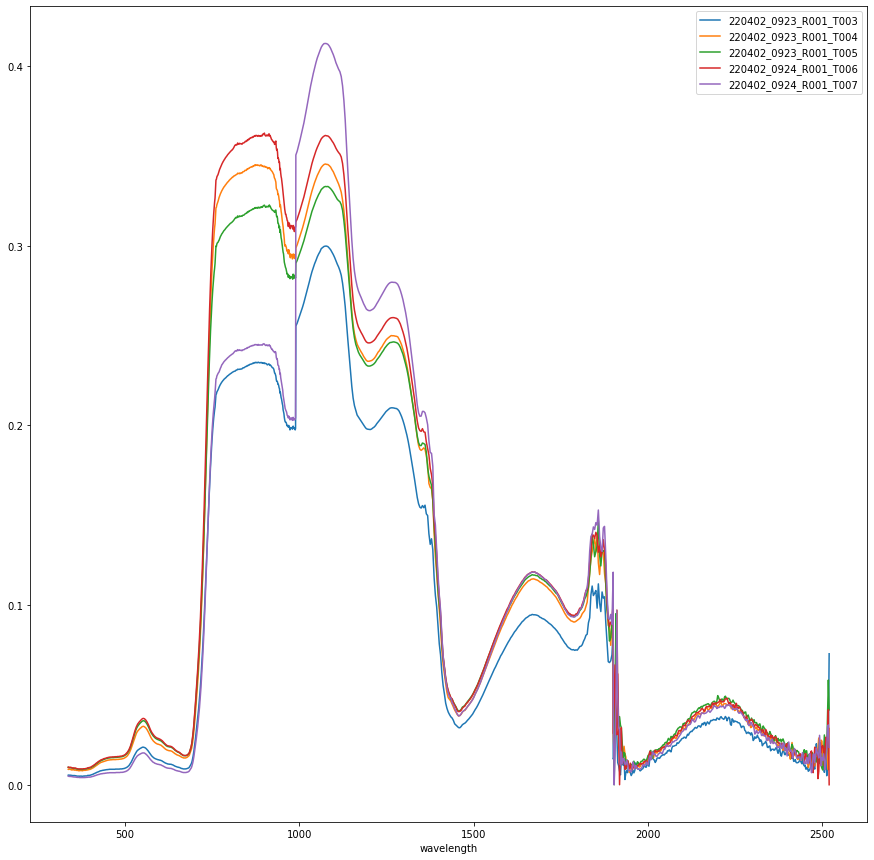

In [120]:
c.data['220402_0923_R001_T003'].plot(legend=True, figsize=(15,15))
c.data['220402_0923_R001_T004'].plot(legend=True, figsize=(15,15))
c.data['220402_0923_R001_T005'].plot(legend=True, figsize=(15,15))
c.data['220402_0924_R001_T006'].plot(legend=True, figsize=(15,15))
c.data['220402_0924_R001_T007'].plot(legend=True, figsize=(15,15))

## Representar los filtros que tiene la cámara MX RedEdge

<AxesSubplot:title={'center':'Micasense Filter + SVC measure'}, xlabel='wavelength', ylabel='Filter Transmissivity (%)'>

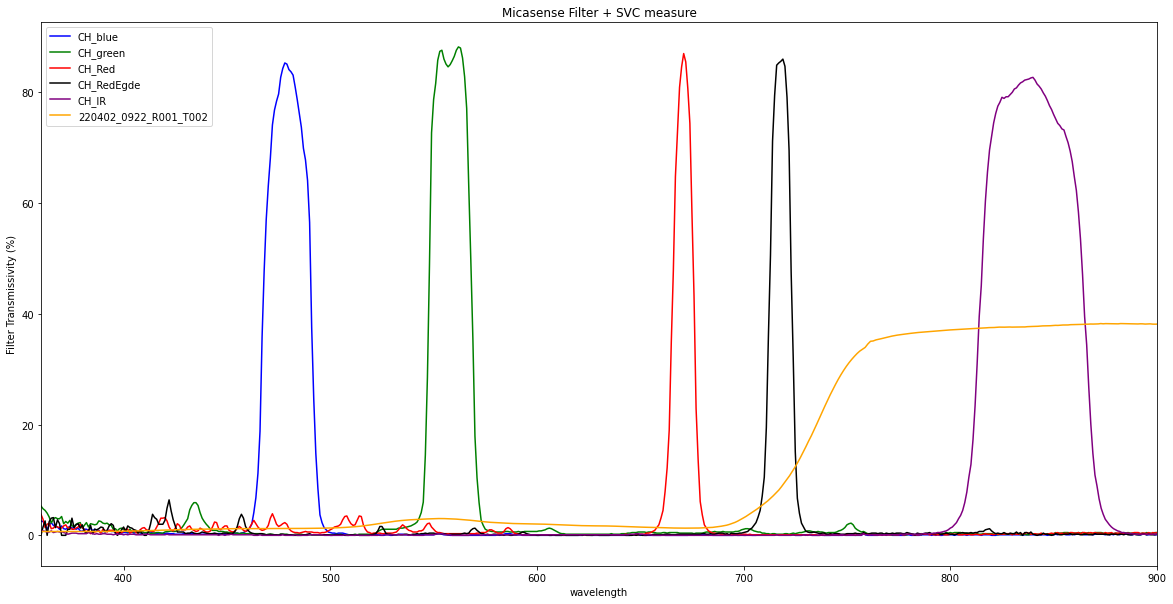

In [7]:
#Representar los filtros del azul, verde, rojo e infrarrojo
redEdge_filters = pd.read_csv('report_RedEdge_3_Filters_srs.csv',sep=';', index_col=0)
redEdge_filters_4_plot = redEdge_filters.replace("%", "", regex=True).astype(float)
redEdge_filters_numeric = (redEdge_filters.replace("%", "", regex=True).astype(float))/100

 #Create figure
legend_names = ['CH_blue','CH_green','CH_Red','CH_RedEgde','CH_IR']
ax = redEdge_filters_4_plot.iloc[:].plot(figsize=(20,10), color=['blue', 'green', 'red', 'black', 'purple'])
plt.legend(legend_names)
plt.title('Micasense Filter + SVC measure')
plt.ylabel('Filter Transmissivity (%)')
plt.xlabel('Wavelength (nm)')
plt.xlim(360, 900)
#plt.ylim(0,100)

(c.data['220402_0922_R001_T002']*100).plot(ax=ax, figsize=(20,10), c= 'orange',legend='SVC spectral')

<AxesSubplot:xlabel='wavelength'>

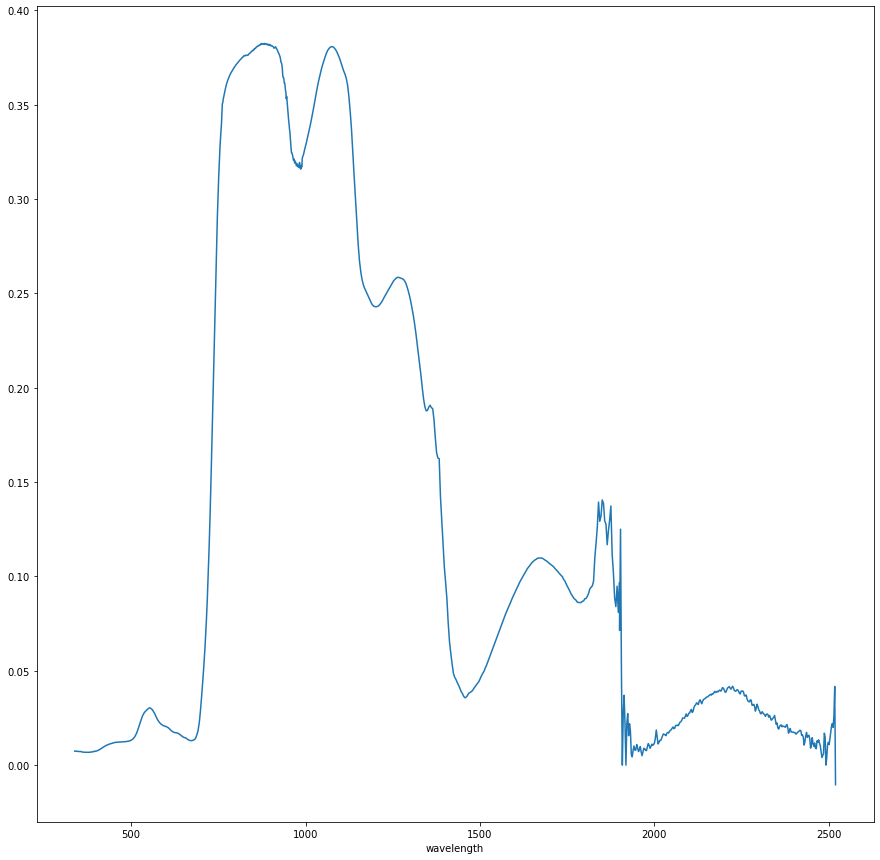

In [9]:
#Espectro SVC
c.data['220402_0922_R001_T002'].plot(figsize=(15,15))

### Sumatorio de la radiancia para cada nivel de transmitancia - INDIVIDUAL (ESTA NO LA HAGO!!)

In [8]:
#Multiplicar los valores de radiancia del SVC por la ponderación que tiene la cámara del drone (Rededge MX) y dividirlo por el sumatorio del porcentaje de la transmitancia (ya que no está normalizado)
CH_blue_value_SVC = (redEdge_filters_numeric['Band 1']*df_interpolate.iloc[:,0]).dropna().sum()/redEdge_filters_numeric['Band 1'].sum()
CH_green_value_SVC = (redEdge_filters_numeric['Band 2']*df_interpolate.iloc[:,0]).dropna().sum()/redEdge_filters_numeric['Band 2'].sum()
CH_red_value_SVC = (redEdge_filters_numeric['Band 3']*df_interpolate.iloc[:,0]).dropna().sum()/redEdge_filters_numeric['Band 3'].sum()
CH_redEdge_value_SVC = (redEdge_filters_numeric['Band 5']*df_interpolate.iloc[:,0]).dropna().sum()/redEdge_filters_numeric['Band 5'].sum()
CH_infraRed_value_SVC = (redEdge_filters_numeric['Band 4']*df_interpolate.iloc[:,0]).dropna().sum()/redEdge_filters_numeric['Band 4'].sum()
#Index into a list
CH_value_SVC = np.array([CH_blue_value_SVC, CH_green_value_SVC, CH_red_value_SVC, CH_redEdge_value_SVC, CH_infraRed_value_SVC])
CH_value_SVC

array([0.01518053, 0.03533469, 0.02493815, 0.09018688, 0.37363588])

### Sumatorio de la radiancia para cada nivel de transmitancia - GRUPAL

In [23]:
# Create empty lists for indexing values
CH_blue = []
CH_green = []
CH_red = []
CH_rededge = []
CH_infrared= []

# Iterate for each measure file ['220402_0922_R001_T002']
for file in list(df_interpolate.columns):
    CH_blue_value_SVC = (redEdge_filters_numeric['Band 1']*df_interpolate[file]).dropna().sum()/redEdge_filters_numeric['Band 1'].sum()
    CH_green_value_SVC = (redEdge_filters_numeric['Band 2']*df_interpolate[file]).dropna().sum()/redEdge_filters_numeric['Band 2'].sum()
    CH_red_value_SVC = (redEdge_filters_numeric['Band 3']*df_interpolate[file]).dropna().sum()/redEdge_filters_numeric['Band 3'].sum()
    CH_redEdge_value_SVC = (redEdge_filters_numeric['Band 5']*df_interpolate[file]).dropna().sum()/redEdge_filters_numeric['Band 5'].sum()
    CH_infraRed_value_SVC = (redEdge_filters_numeric['Band 4']*df_interpolate[file]).dropna().sum()/redEdge_filters_numeric['Band 4'].sum()
    
    # Append values to list
    CH_blue.append(CH_blue_value_SVC)
    CH_green.append(CH_green_value_SVC)
    CH_red.append(CH_red_value_SVC)
    CH_rededge.append(CH_redEdge_value_SVC)
    CH_infrared.append(CH_infraRed_value_SVC)

# Create pandas dataframe with all channels
df_svc = pd.DataFrame(columns=['CH_blue_SVC','CH_green_SVC','CH_red_SVC','CH_redEdge_SVC','CH_infrared_SVC'], index=df_interpolate.columns)
df_svc['CH_blue_SVC'] = CH_blue
df_svc['CH_green_SVC'] = CH_green
df_svc['CH_red_SVC'] = CH_red
df_svc['CH_redEdge_SVC'] = CH_rededge
df_svc['CH_infrared_SVC'] = CH_infrared

## Extraer las medidas de los canales (MX-RedEdge) para cada plot

In [24]:
#shape_secano = gpd.read_file('C://Users/sergi/Documents/git_repos/00-CSIC/01-Plot_wheat_extract/01_shapefiles/plots_secano/secano_shapefile_full_atributes.shp').set_index('id_real')
svc_medidas_atributos = gpd.read_file('C://Users/sergi/Documents/git_repos/00-CSIC/01-Plot_wheat_extract/01_shapefiles/svc_medidas/svc_medidas_20220402.shp')
#Read tiff files for get MX index
blue_tiff = 'C://Users/sergi/Documents/git_repos/00-CSIC/01-Plot_wheat_extract/02_tiff_files/indices_MX/blue/Santaella_20220402_MX_index_blue.tif'
green_tiff = 'C://Users/sergi/Documents/git_repos/00-CSIC/01-Plot_wheat_extract/02_tiff_files/indices_MX/green/Santaella_20220402_MX_index_green.tif'
red_tiff = 'C://Users/sergi/Documents/git_repos/00-CSIC/01-Plot_wheat_extract/02_tiff_files/indices_MX/red/Santaella_20220402_MX_index_red.tif'
rededge_tiff = 'C://Users/sergi/Documents/git_repos/00-CSIC/01-Plot_wheat_extract/02_tiff_files/indices_MX/red_edge/Santaella_20220402_MX_index_red_edge.tif'
nir_tiff = 'C://Users/sergi/Documents/git_repos/00-CSIC/01-Plot_wheat_extract/02_tiff_files/indices_MX/nir/Santaella_20220402_MX_index_nir.tif'

In [25]:
stats_computed = 'mean max min median std'
#Calculate zonal statistics of NDVI and join with shapefile atributes
df_blue_stats_MX = pd.DataFrame(zonal_stats(svc_medidas_atributos, blue_tiff, stats = stats_computed)).rename(columns={"min": "MX_min_BLUE", "max": "MX_max_BLUE", "mean": "MX_mean_BLUE", "median": "MX_median_BLUE", "std": "MX_std_BLUE"})
df_green_stats_MX = pd.DataFrame(zonal_stats(svc_medidas_atributos, green_tiff, stats = stats_computed)).rename(columns={"min": "MX_min_GREEN", "max": "MX_max_GREEN", "mean": "MX_mean_GREEN", "median": "MX_median_GREEN", "std": "MX_std_GREEN"})
df_red_stats_MX = pd.DataFrame(zonal_stats(svc_medidas_atributos, red_tiff, stats = stats_computed)).rename(columns={"min": "MX_min_RED", "max": "MX_max_RED", "mean": "MX_mean_RED", "median": "MX_median_RED", "std": "MX_std_RED"})
df_redegde_stats_MX = pd.DataFrame(zonal_stats(svc_medidas_atributos, rededge_tiff, stats = stats_computed)).rename(columns={"min": "MX_min_REDEDGE", "max": "MX_max_REDEDGE", "mean": "MX_mean_REDEDGE", "median": "MX_median_REDEDGE", "std": "MX_std_REDEDGE"})
df_nir_stats_MX = pd.DataFrame(zonal_stats(svc_medidas_atributos, nir_tiff, stats = stats_computed)).rename(columns={"min": "MX_min_NIR", "max": "MX_max_NIR", "mean": "MX_mean_NIR", "median": "MX_median_NIR", "std": "MX_std_NIR"})

df_stats = svc_medidas_atributos.join(df_blue_stats_MX).join(df_green_stats_MX).join(df_red_stats_MX).join(df_redegde_stats_MX).join(df_nir_stats_MX)

In [27]:
df_stats.columns

Index(['id_real', 'fila_real', 'columna_re', 'id_josefin', 'tipo',
       'repeticion', 'numero_var', 'nombre_var', 'file', 'file_1',
       'instrument', 'integratio', 'measuremen', 'gps_time_r', 'gps_time_t',
       'longitude_', 'longitud_1', 'latitude_r', 'latitude_t', 'wavelength',
       'waveleng_1', 'ndvi', 'geometry', 'MX_min_BLUE', 'MX_max_BLUE',
       'MX_mean_BLUE', 'MX_std_BLUE', 'MX_median_BLUE', 'MX_min_GREEN',
       'MX_max_GREEN', 'MX_mean_GREEN', 'MX_std_GREEN', 'MX_median_GREEN',
       'MX_min_RED', 'MX_max_RED', 'MX_mean_RED', 'MX_std_RED',
       'MX_median_RED', 'MX_min_REDEDGE', 'MX_max_REDEDGE', 'MX_mean_REDEDGE',
       'MX_std_REDEDGE', 'MX_median_REDEDGE', 'MX_min_NIR', 'MX_max_NIR',
       'MX_mean_NIR', 'MX_std_NIR', 'MX_median_NIR'],
      dtype='object')

## Combinar los dataframe de SVC con el de la cámara-MX

In [28]:
"""
INPUT:
    df_stats   --> MX camera
    df_svc  --> SVC
OUTPUT:
    df_stats_full --> Combining both dataframes
"""

#Set index for merging with the same index both
df_stats = df_stats.reset_index().set_index('file')
#Merging both dataframe
df_stats_full= pd.merge(df_stats, df_svc, left_index=True, right_index=True)
df_stats_full = df_stats_full.reset_index().set_index('id_real')
#Write into a csv file
df_stats_full.to_csv('df_stats_calibration_SVC_and_MX.csv')

## PLOTEAR LAS GRÁFICAS DE DISPERSIÓN

In [29]:
df_stats_full.columns

Index(['level_0', 'index', 'fila_real', 'columna_re', 'id_josefin', 'tipo',
       'repeticion', 'numero_var', 'nombre_var', 'file_1', 'instrument',
       'integratio', 'measuremen', 'gps_time_r', 'gps_time_t', 'longitude_',
       'longitud_1', 'latitude_r', 'latitude_t', 'wavelength', 'waveleng_1',
       'ndvi', 'geometry', 'MX_min_BLUE', 'MX_max_BLUE', 'MX_mean_BLUE',
       'MX_std_BLUE', 'MX_median_BLUE', 'MX_min_GREEN', 'MX_max_GREEN',
       'MX_mean_GREEN', 'MX_std_GREEN', 'MX_median_GREEN', 'MX_min_RED',
       'MX_max_RED', 'MX_mean_RED', 'MX_std_RED', 'MX_median_RED',
       'MX_min_REDEDGE', 'MX_max_REDEDGE', 'MX_mean_REDEDGE', 'MX_std_REDEDGE',
       'MX_median_REDEDGE', 'MX_min_NIR', 'MX_max_NIR', 'MX_mean_NIR',
       'MX_std_NIR', 'MX_median_NIR', 'CH_blue_SVC', 'CH_green_SVC',
       'CH_red_SVC', 'CH_redEdge_SVC', 'CH_infrared_SVC'],
      dtype='object')

In [88]:
from scipy import stats
def RMSE(df, p, x):
    return ((df[p] - df[x]) ** 2).mean() ** .5
    
def lregress(df, p, x):
    subset = df.dropna(subset=[p,x])
    slope, intercept, r_value, p_value, std_err = stats.linregress(subset[x], subset[p])
    return(slope, intercept, r_value*r_value, p_value, std_err)

def validation_plot(x, y, data, title=None, x_label=None, y_label=None, alpha=.5, c=None, cmap='jet', ax=None, size=40):
    slope, intercept, r2, p_value, std_err = lregress(data, y, x)
    rmse = RMSE(data, y, x)
    if ax is None:
        fig, ax = plt.subplots(1, 1)
    if c is None:
        data.plot.scatter(x=x, y=y, marker='.', alpha=alpha, ax=ax, s=size)
    else:
        data.plot.scatter(x=x, y=y, marker='.', alpha=alpha, c=c, cmap=cmap, ax=ax, s=size)
    min_val = min(data[x].min(), data[y].min())
    max_val = max(data[x].max(), data[y].max())
    ax.plot([min_val,max_val], [min_val,max_val], c='black')
    ax.set_xlim(min_val, max_val)
    ax.set_ylim(min_val, max_val)
    val_text = "$r^2$: {r2:.5f}, slope: {slope:.2f}, intercept: {intercept:.5f}, RMSE: {rmse:.5f}".format(r2=r2, slope=slope, intercept=intercept, rmse=rmse)
    if title is None:
        ax.set_title("MX-drone ({x}) vs SVC ({y})\n{val}\n".format(x=x, y=y, val=val_text))
    else:
        ax.set_title(title)
    if x_label is not None:
        ax.set_xlabel(x_label)
    if y_label is not None:
        ax.set_ylabel(y_label)

In [175]:
df_stats_full.columns

Index(['level_0', 'index', 'fila_real', 'columna_re', 'id_josefin', 'tipo',
       'repeticion', 'numero_var', 'nombre_var', 'file_1', 'instrument',
       'integratio', 'measuremen', 'gps_time_r', 'gps_time_t', 'longitude_',
       'longitud_1', 'latitude_r', 'latitude_t', 'wavelength', 'waveleng_1',
       'ndvi', 'geometry', 'MX_min_BLUE', 'MX_max_BLUE', 'MX_mean_BLUE',
       'MX_median_BLUE', 'MX_min_GREEN', 'MX_max_GREEN', 'MX_mean_GREEN',
       'MX_median_GREEN', 'MX_min_RED', 'MX_max_RED', 'MX_mean_RED',
       'MX_median_RED', 'MX_min_REDEDGE', 'MX_max_REDEDGE', 'MX_mean_REDEDGE',
       'MX_median_REDEDGE', 'MX_min_NIR', 'MX_max_NIR', 'MX_mean_NIR',
       'MX_median_NIR', 'CH_blue_SVC', 'CH_green_SVC', 'CH_red_SVC',
       'CH_redEdge_SVC', 'CH_infrared_SVC'],
      dtype='object')

In [45]:
df_stats_full

,level_0,index,fila_real,columna_re,id_josefin,tipo,repeticion,numero_var,nombre_var,file_1,...,MX_min_NIR,MX_max_NIR,MX_mean_NIR,MX_std_NIR,MX_median_NIR,CH_blue_SVC,CH_green_SVC,CH_red_SVC,CH_redEdge_SVC,CH_infrared_SVC
id_real,,,,,,,,,,,,,,,,,,,,,
1001,220402_0922_R001_T002,0,1,1,0.0,secano,0,9999.0,buffer,Z:\11-Projects\CERESTRES\04-Raw\SVC_HR1024i\Sa...,...,0.152900,0.577122,0.427404,0.066040,0.434030,0.015181,0.035335,0.024938,0.090187,0.373636
2001,220402_0923_R001_T003,1,1,2,0.0,secano,0,9999.0,buffer,Z:\11-Projects\CERESTRES\04-Raw\SVC_HR1024i\Sa...,...,0.160568,0.562768,0.383308,0.071115,0.386426,0.010399,0.023536,0.016217,0.059438,0.229814
3001,220402_0923_R001_T004,2,1,3,0.0,secano,0,9999.0,buffer,Z:\11-Projects\CERESTRES\04-Raw\SVC_HR1024i\Sa...,...,0.208420,0.510829,0.397479,0.050806,0.402067,0.016608,0.036437,0.025634,0.090507,0.337989
4001,220402_0923_R001_T005,3,1,4,0.0,secano,0,9999.0,buffer,Z:\11-Projects\CERESTRES\04-Raw\SVC_HR1024i\Sa...,...,0.196627,0.562284,0.379871,0.074061,0.382111,0.017586,0.038359,0.026150,0.092360,0.314018
5001,220402_0924_R001_T006,4,1,5,0.0,secano,0,9999.0,buffer,Z:\11-Projects\CERESTRES\04-Raw\SVC_HR1024i\Sa...,...,0.230481,0.512854,0.399248,0.053995,0.403294,0.018290,0.040502,0.027626,0.098952,0.353793
6001,220402_0924_R001_T007,5,1,6,0.0,secano,0,9999.0,buffer,Z:\11-Projects\CERESTRES\04-Raw\SVC_HR1024i\Sa...,...,0.126210,0.540818,0.404924,0.076065,0.416042,0.008613,0.021054,0.014602,0.055748,0.239762
7001,220402_0924_R001_T008,6,1,7,0.0,secano,0,9999.0,buffer,Z:\11-Projects\CERESTRES\04-Raw\SVC_HR1024i\Sa...,...,0.156003,0.510738,0.350718,0.066509,0.354978,0.015844,0.034888,0.024173,0.085506,0.302772
8001,220402_0925_R001_T009,7,1,8,0.0,secano,0,9999.0,buffer,Z:\11-Projects\CERESTRES\04-Raw\SVC_HR1024i\Sa...,...,0.194467,0.501245,0.382568,0.054666,0.387884,0.013229,0.029359,0.020780,0.072717,0.288285
9001,220402_0925_R001_T010,8,1,9,0.0,secano,0,9999.0,buffer,Z:\11-Projects\CERESTRES\04-Raw\SVC_HR1024i\Sa...,...,0.094927,0.558956,0.366360,0.090652,0.377396,0.014254,0.033801,0.023504,0.089045,0.368068


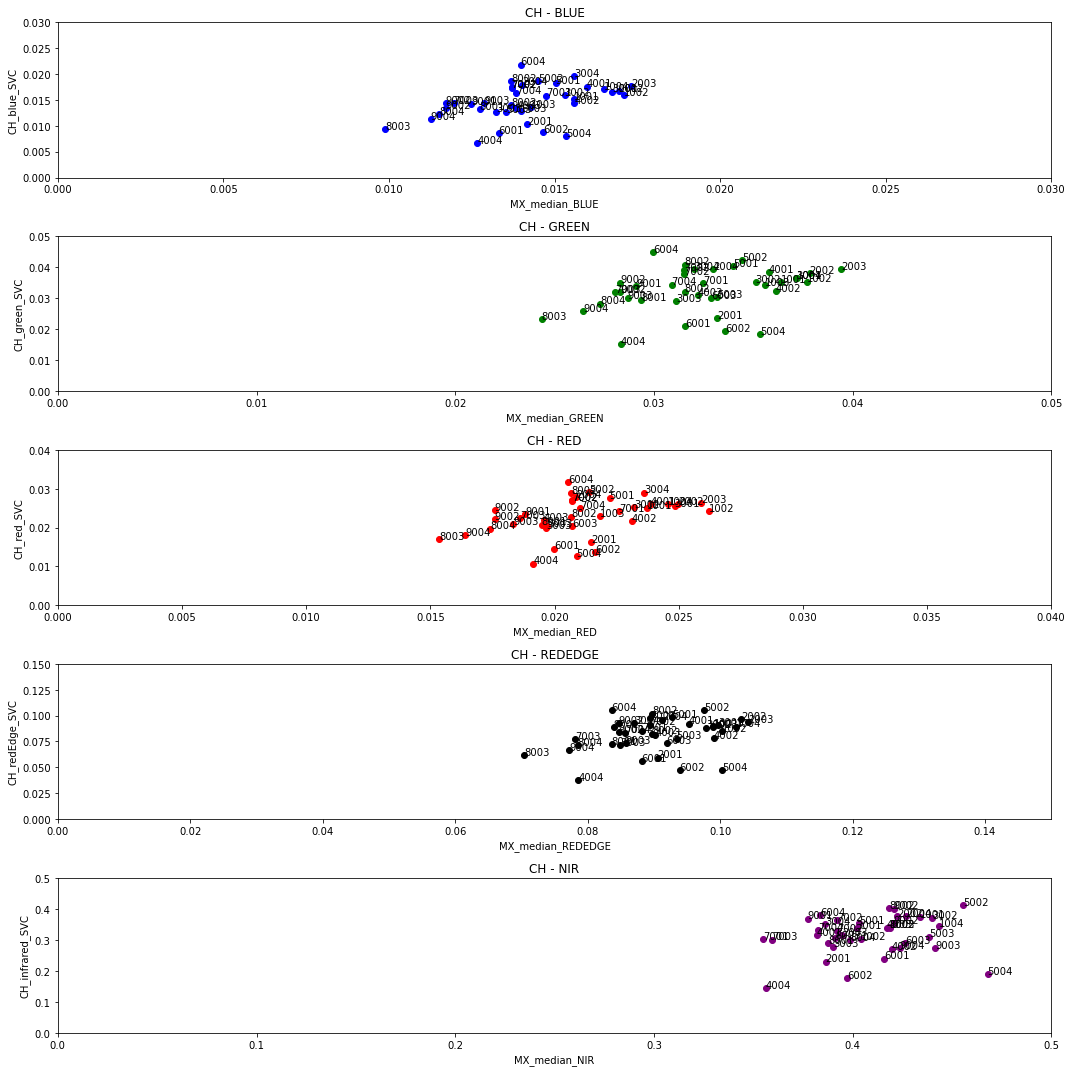

In [77]:
fig, axs = plt.subplots(5, figsize=(15,15))

#CHANNEL BLUE
for x, y, ids in zip(df_stats_full['MX_median_BLUE'], df_stats_full['CH_blue_SVC'], df_stats_full.index):
    axs[0].plot(x,y, 'o', c='blue')
    axs[0].text(x, y, '%s' % (ids))
    axs[0].set_title('CH - BLUE')
    axs[0].set_ylabel('CH_blue_SVC')
    axs[0].set_xlabel('MX_median_BLUE')
    axs[0].set_xlim(0,0.03)
    axs[0].set_ylim(0,0.03)  

#CHANNEL GREEN
for x, y, ids in zip(df_stats_full['MX_median_GREEN'], df_stats_full['CH_green_SVC'], df_stats_full.index):
    axs[1].plot(x,y, 'o', c='green')
    axs[1].text(x, y, '%s' % (ids))
    axs[1].set_title('CH - GREEN')
    axs[1].set_ylabel('CH_green_SVC')
    axs[1].set_xlabel('MX_median_GREEN')
    axs[1].set_xlim(0,0.05)
    axs[1].set_ylim(0,0.05) 
    
#CHANNEL RED
for x, y, ids in zip(df_stats_full['MX_median_RED'], df_stats_full['CH_red_SVC'], df_stats_full.index):
    axs[2].plot(x,y, 'o', c='red')
    axs[2].text(x, y, '%s' % (ids))
    axs[2].set_title('CH - RED')
    axs[2].set_ylabel('CH_red_SVC')
    axs[2].set_xlabel('MX_median_RED')
    axs[2].set_xlim(0,0.04)
    axs[2].set_ylim(0,0.04) 
    
#CHANNEL REDEDGE
for x, y, ids in zip(df_stats_full['MX_median_REDEDGE'], df_stats_full['CH_redEdge_SVC'], df_stats_full.index):
    axs[3].plot(x,y, 'o', c='k')
    axs[3].text(x, y, '%s' % (ids))
    axs[3].set_title('CH - REDEDGE')
    axs[3].set_ylabel('CH_redEdge_SVC')
    axs[3].set_xlabel('MX_median_REDEDGE')
    axs[3].set_xlim(0,0.15)
    axs[3].set_ylim(0,0.15) 
    
#CHANNEL NIR
for x, y, ids in zip(df_stats_full['MX_median_NIR'], df_stats_full['CH_infrared_SVC'], df_stats_full.index):
    axs[4].plot(x,y, 'o', c='purple')
    axs[4].text(x, y, '%s' % (ids))
    axs[4].set_title('CH - NIR')
    axs[4].set_ylabel('CH_infrared_SVC')
    axs[4].set_xlabel('MX_median_NIR')
    axs[4].set_xlim(0,0.5)
    axs[4].set_ylim(0,0.5) 
    
fig.tight_layout()

#TENGO QUE COMPROBAR QUE LAS REPRESENTACIONES SEAN DIFERENTES, AUNQUE A PRIORI PARECE QUE SÍ PORQUE HE TENIDO QUE CAMBIAR LA RESOLUCION.

<AxesSubplot:xlabel='MX_median_NIR', ylabel='CH_infrared_SVC'>

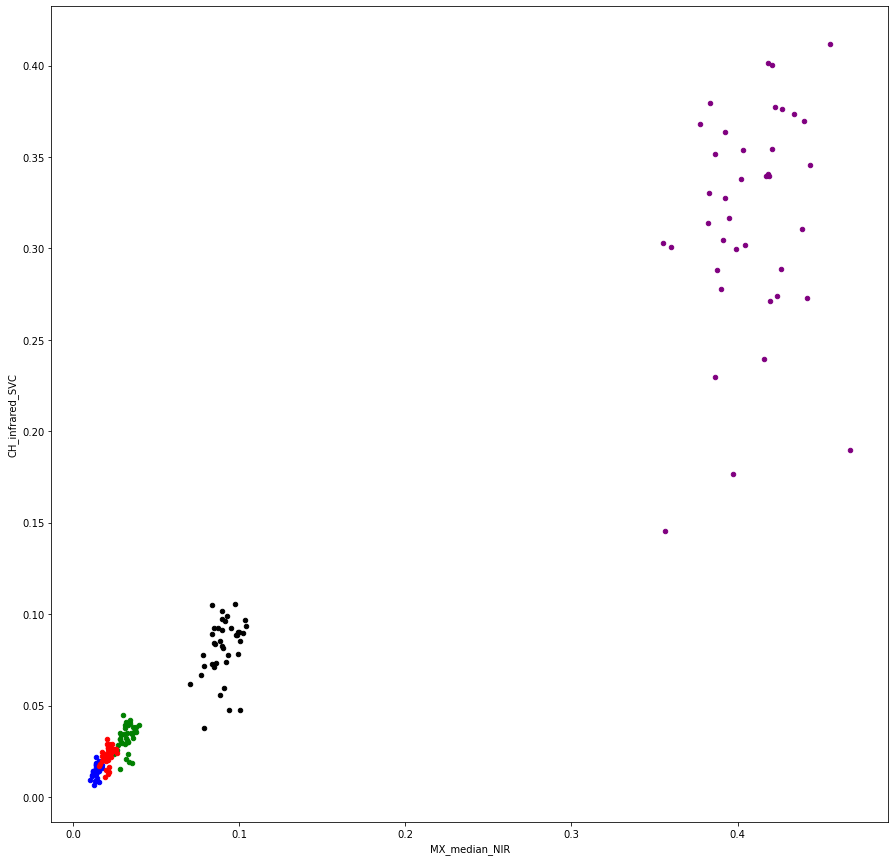

In [44]:
fig, axarr = plt.subplots(1,1, figsize=(15,15))
df_stats_full.plot.scatter('MX_median_BLUE', 'CH_blue_SVC', ax=axarr, c='blue')
df_stats_full.plot.scatter('MX_median_GREEN', 'CH_green_SVC', ax=axarr, alpha=1, c='green')
df_stats_full.plot.scatter('MX_median_RED', 'CH_red_SVC',  ax=axarr, alpha=1, c='red')
df_stats_full.plot.scatter('MX_median_REDEDGE', 'CH_redEdge_SVC', ax=axarr, alpha=1, c='k')
df_stats_full.plot.scatter('MX_median_NIR', 'CH_infrared_SVC',  ax=axarr, alpha=1, c='purple')


## Valores mediana sin OUTLIERS

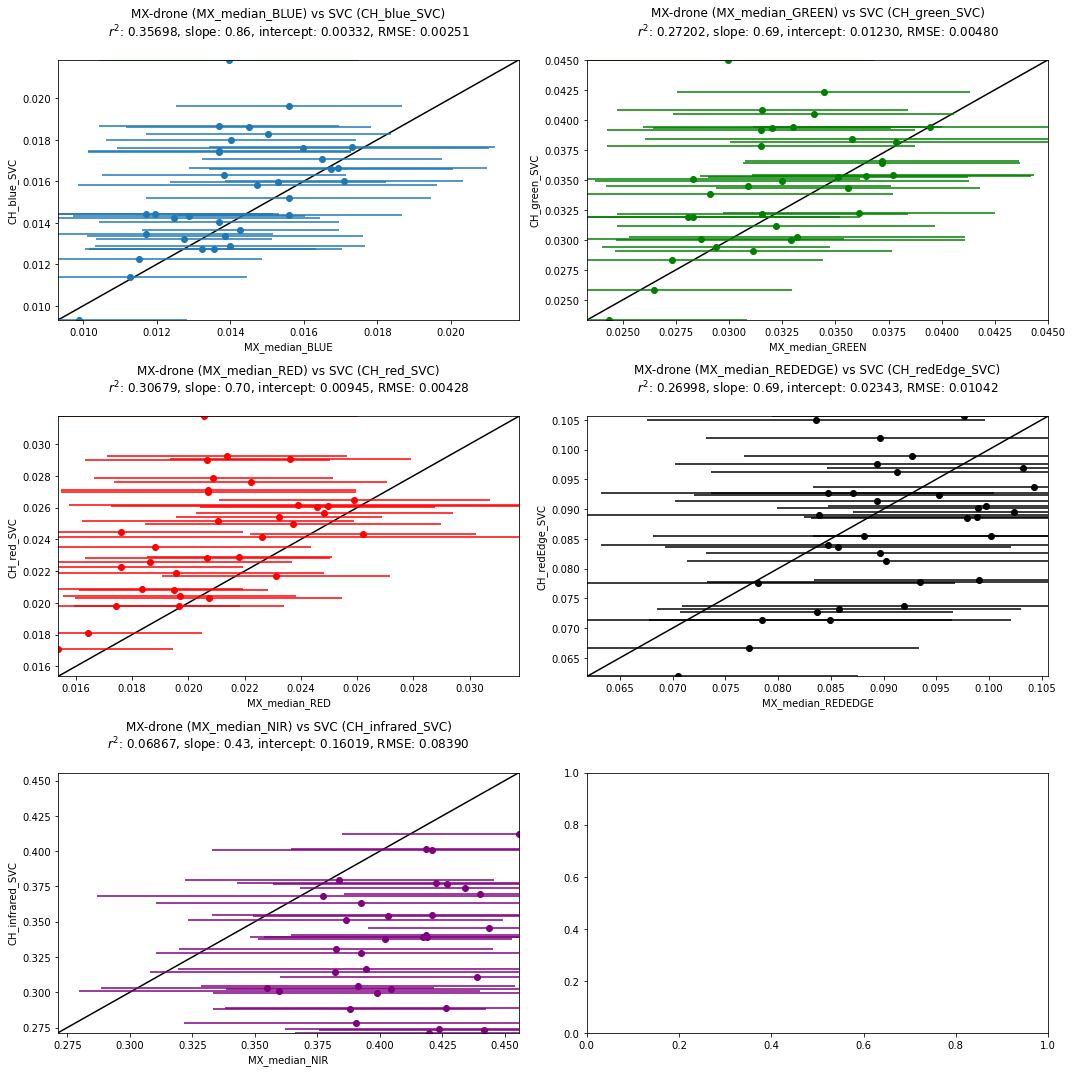

In [104]:
## Eliminando los outliers, 2001, 4004, 5004, 6001, 6002.
outliers = [2001,4004,5004,6001,6002]
df_stats_sin_outliers = df_stats_full.drop(outliers)
#
fig, axarr = plt.subplots(3,2, figsize=(15,15))
#Graph CH - BLUE
validation_plot('MX_median_BLUE', 'CH_blue_SVC',df_stats_sin_outliers,  ax=axarr[0][0], alpha=1)
axarr[0][0].errorbar(df_stats_sin_outliers['MX_median_BLUE'], df_stats_sin_outliers['CH_blue_SVC'], xerr=df_stats_sin_outliers['MX_std_BLUE'], fmt='o')

#Graph CH - GREEN
validation_plot('MX_median_GREEN', 'CH_green_SVC',df_stats_sin_outliers, ax=axarr[0][1], alpha=1)
axarr[0][1].errorbar(df_stats_sin_outliers['MX_median_GREEN'], df_stats_sin_outliers['CH_green_SVC'], xerr=df_stats_sin_outliers['MX_std_GREEN'], fmt='go')

#Graph CH - RED
validation_plot('MX_median_RED', 'CH_red_SVC',df_stats_sin_outliers,  ax=axarr[1][0], alpha=1)
axarr[1][0].errorbar(df_stats_sin_outliers['MX_median_RED'], df_stats_sin_outliers['CH_red_SVC'], xerr=df_stats_sin_outliers['MX_std_RED'], fmt='ro')

#Graph CH - REDEDGE
validation_plot('MX_median_REDEDGE', 'CH_redEdge_SVC',df_stats_sin_outliers, ax=axarr[1][1], alpha=1)
axarr[1][1].errorbar(df_stats_sin_outliers['MX_median_REDEDGE'], df_stats_sin_outliers['CH_redEdge_SVC'], xerr=df_stats_sin_outliers['MX_std_REDEDGE'], fmt='ko')

#Graph CH - NIR
validation_plot('MX_median_NIR', 'CH_infrared_SVC',df_stats_sin_outliers,  ax=axarr[2][0], alpha=1)
axarr[2][0].errorbar(df_stats_sin_outliers['MX_median_NIR'], df_stats_sin_outliers['CH_infrared_SVC'], xerr=df_stats_sin_outliers['MX_std_NIR'], fmt='o', c='purple')

fig.tight_layout()

## Valores mediana

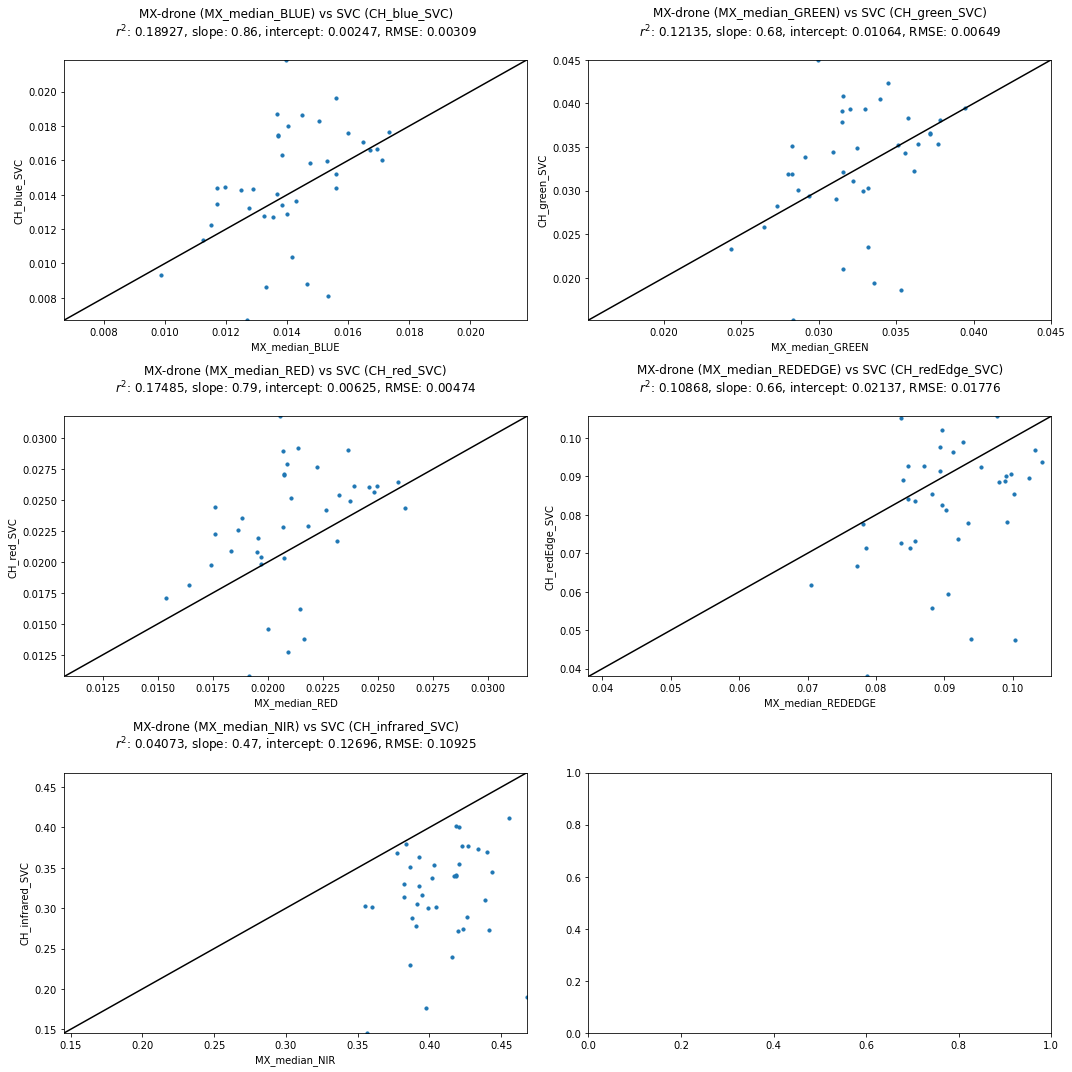

In [90]:
fig, axarr = plt.subplots(3,2, figsize=(15,15))
validation_plot('MX_median_BLUE', 'CH_blue_SVC',df_stats_full,  ax=axarr[0][0], alpha=1)
validation_plot('MX_median_GREEN', 'CH_green_SVC',df_stats_full, ax=axarr[0][1], alpha=1)
validation_plot('MX_median_RED', 'CH_red_SVC',df_stats_full,  ax=axarr[1][0], alpha=1)
validation_plot('MX_median_REDEDGE', 'CH_redEdge_SVC',df_stats_full, ax=axarr[1][1], alpha=1)
validation_plot('MX_median_NIR', 'CH_infrared_SVC',df_stats_full,  ax=axarr[2][0], alpha=1)
fig.tight_layout()

## Valores medios

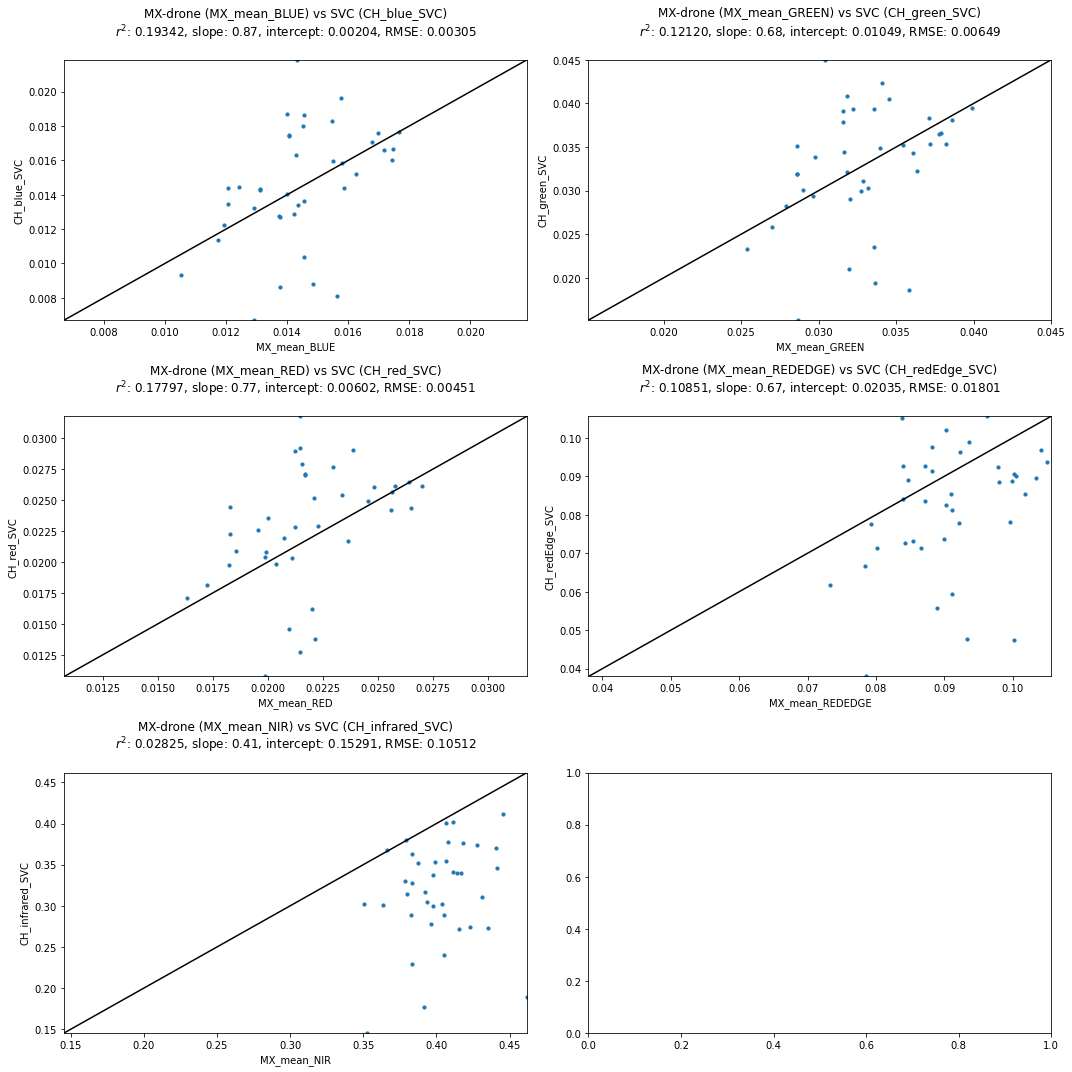

In [187]:
fig, axarr = plt.subplots(3,2, figsize=(15,15))
validation_plot('MX_mean_BLUE', 'CH_blue_SVC',df_stats_full,  ax=axarr[0][0], alpha=1)
validation_plot('MX_mean_GREEN', 'CH_green_SVC',df_stats_full, ax=axarr[0][1], alpha=1)
validation_plot('MX_mean_RED', 'CH_red_SVC',df_stats_full,  ax=axarr[1][0], alpha=1)
validation_plot('MX_mean_REDEDGE', 'CH_redEdge_SVC',df_stats_full, ax=axarr[1][1], alpha=1)
validation_plot('MX_mean_NIR', 'CH_infrared_SVC',df_stats_full,  ax=axarr[2][0], alpha=1)
fig.tight_layout()

## Valores máximos

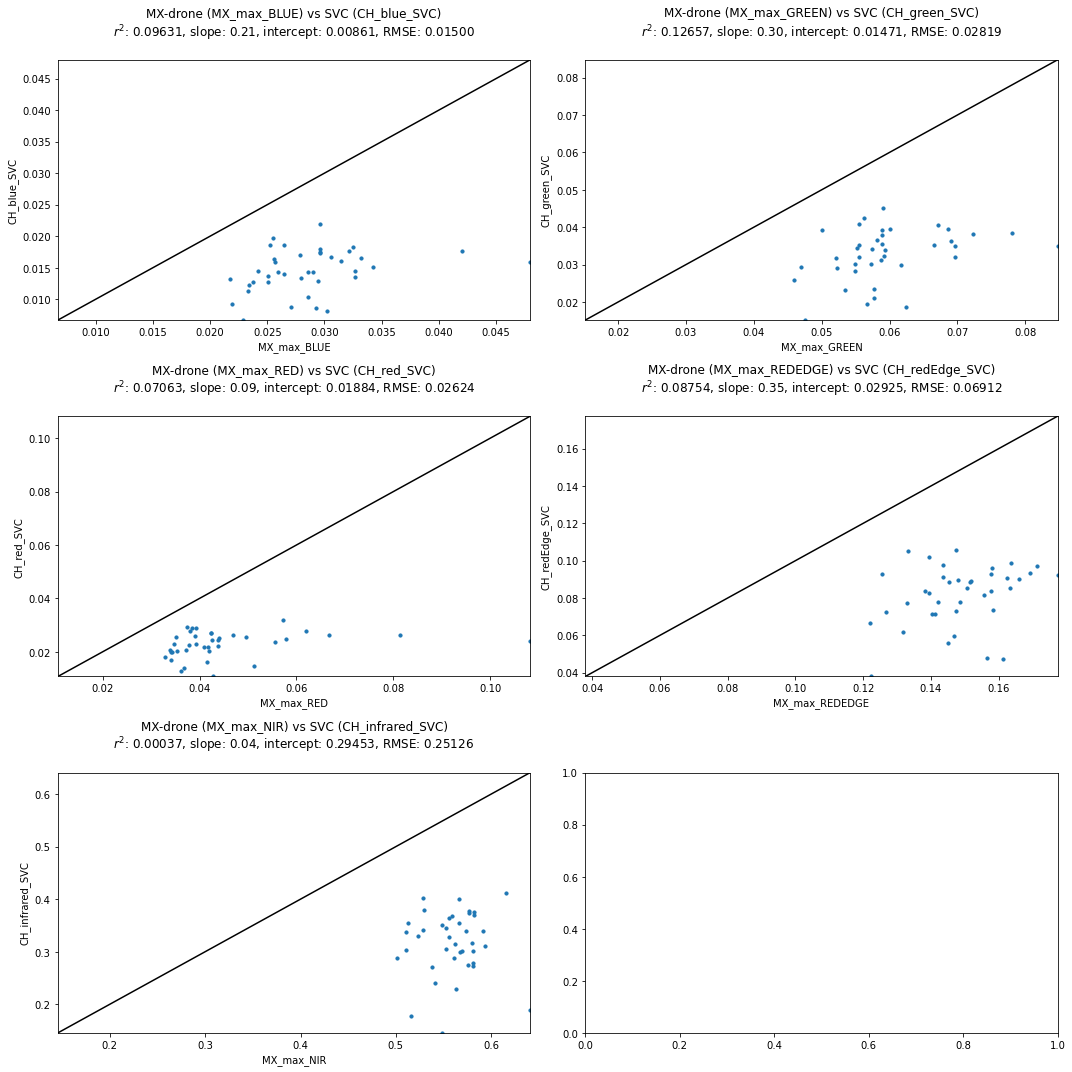

In [185]:
fig, axarr = plt.subplots(3,2, figsize=(15,15))
validation_plot('MX_max_BLUE', 'CH_blue_SVC',df_stats_full,  ax=axarr[0][0], alpha=1)
validation_plot('MX_max_GREEN', 'CH_green_SVC',df_stats_full, ax=axarr[0][1], alpha=1)
validation_plot('MX_max_RED', 'CH_red_SVC',df_stats_full,  ax=axarr[1][0], alpha=1)
validation_plot('MX_max_REDEDGE', 'CH_redEdge_SVC',df_stats_full, ax=axarr[1][1], alpha=1)
validation_plot('MX_max_NIR', 'CH_infrared_SVC',df_stats_full,  ax=axarr[2][0], alpha=1)
fig.tight_layout()

## Valores mínimos

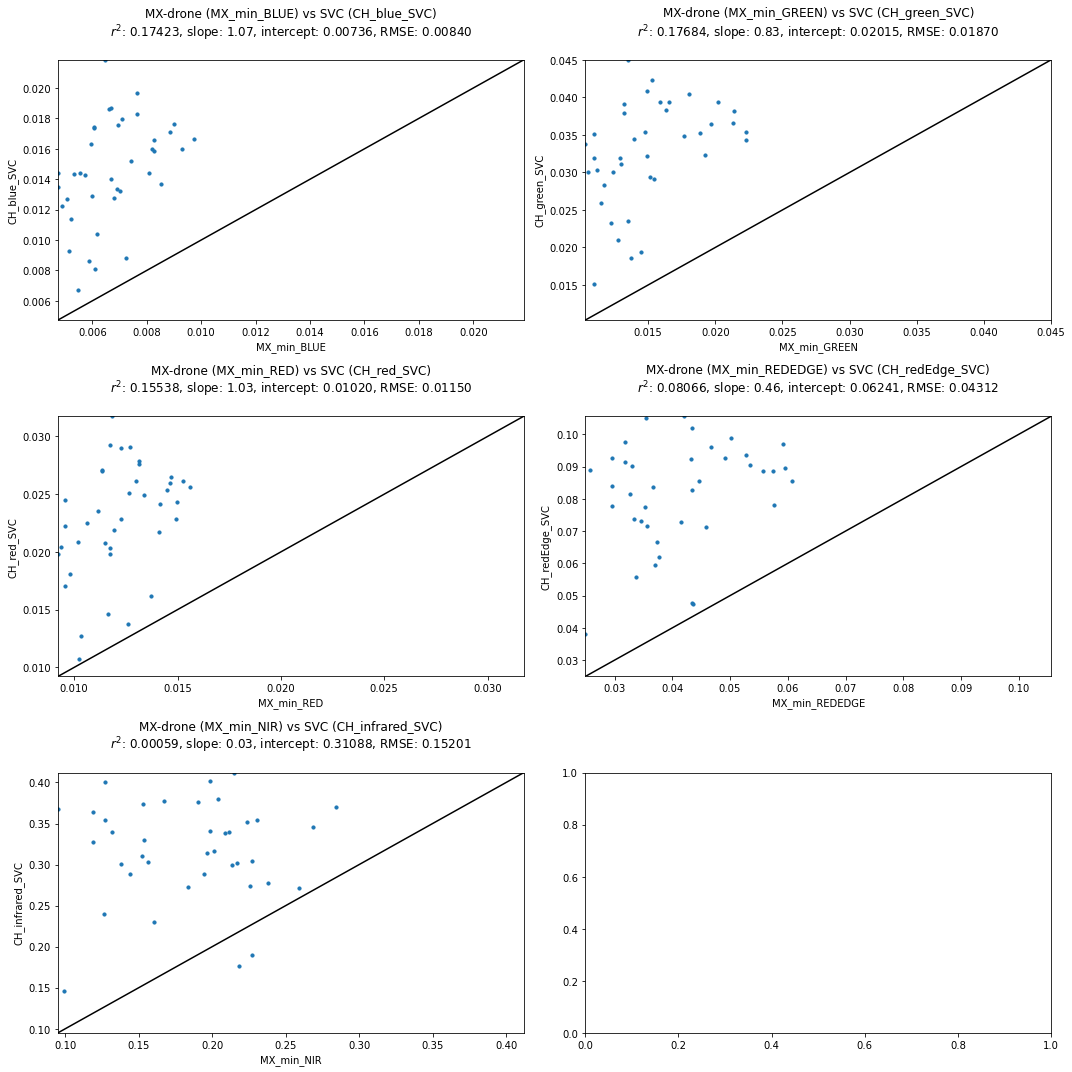

In [186]:
fig, axarr = plt.subplots(3,2, figsize=(15,15))
validation_plot('MX_min_BLUE', 'CH_blue_SVC',df_stats_full,  ax=axarr[0][0], alpha=1)
validation_plot('MX_min_GREEN', 'CH_green_SVC',df_stats_full, ax=axarr[0][1], alpha=1)
validation_plot('MX_min_RED', 'CH_red_SVC',df_stats_full,  ax=axarr[1][0], alpha=1)
validation_plot('MX_min_REDEDGE', 'CH_redEdge_SVC',df_stats_full, ax=axarr[1][1], alpha=1)
validation_plot('MX_min_NIR', 'CH_infrared_SVC',df_stats_full,  ax=axarr[2][0], alpha=1)
fig.tight_layout()

# NO MIRAR, SON PRUEBAS

In [43]:
ch_blue = (redEdge_filters_numeric['Band 1']*df_interpolate.iloc[:,0]).dropna().sum()

In [36]:
ch_blue_clean = ch_blue.dropna()

In [44]:
ch_blue

0.2996635996097519

In [21]:
redEdge_filters_numeric

,Band 1,Band 2,Band 3,Band 5,Band 4
Wavlength (nm),,,,,
360,0.026,0.053,0.038,0.000,0.009
361,0.025,0.048,0.029,0.015,0.008
362,0.018,0.045,0.014,0.026,0.007
363,0.011,0.040,0.020,0.000,0.006
364,0.018,0.033,0.022,0.025,0.006
...,...,...,...,...,...
896,0.001,0.004,0.005,0.002,0.002
897,0.002,0.004,0.003,0.001,0.002
898,0.002,0.003,0.005,0.001,0.002


In [26]:
df_interpolate.iloc[:,0]

338     0.007400
339     0.007377
340     0.007355
341     0.007332
342     0.007309
          ...   
2514    0.016900
2515    0.016900
2516    0.016900
2517    0.016900
2518    0.016900
Name: 220402_0922_R001_T002, Length: 2181, dtype: float64

In [ ]:
redEdge_filters = pd.read_csv('report_RedEdge_3_Filters_srs.csv',sep=';', index_col=0)
redEdge_filters_trans = redEdge_filters.transpose()
redEdge_filters_trans = redEdge_filters_trans.replace("%", "", regex=True).astype(float)

In [ ]:
redEdge_filters_trans

In [ ]:
redEdge_filters_trans.iloc[0].transpose().plot()

In [ ]:
redEdge_filters_trans.iloc[0,0]

In [ ]:
redEdge_filters_trans = redEdge_filters.transpose()
redEdge_filters_trans

In [ ]:
redEdge_filters_trans = redEdge_filters_trans.replace("%", "", regex=True)

In [ ]:
redEdge_filters_trans

In [ ]:
redEdge_filters_trans.iloc[0]

In [ ]:
float(redEdge_filters_trans.iloc[0].replace("%", ""))/100

In [ ]:
redEdge_filters_trans = redEdge_filters.transpose()
redEdge_filters['Band 1'].transpose().plot()

In [ ]:
inicio_wv = 338
fin_wv = 2519
intervalo = 1
#df_blue = df_spectral.loc['220402_0922_R001_T002',inicio_wv:fin_wv]
df_blue = df_spectral.loc['220402_0922_R001_T002',:]
new_index = pd.Index(np.arange(inicio_wv,fin_wv,intervalo))

In [ ]:
len(df_blue.index)

In [ ]:
df_blue

In [ ]:
df_interpolate = df_blue.reindex(new_index).interpolate()

In [ ]:
df_interpolate.isna().sum()

In [ ]:
df_spectral.loc['220402_0922_R001_T002',:]

In [ ]:
df_blue.reindex(new_index).interpolate()

In [ ]:
new_index

In [ ]:
df_blue

In [ ]:
df_spectral

In [ ]:
spectrum.metadata

In [ ]:
c.data.iloc[338:359 ,0]

In [ ]:
c.data.index[339:350]